In [1]:
import polars as pl

In [2]:
preds1 = pl.read_csv('/root/workspace/Learning_Equality/ensemble_3S1-4S2/oof_df_all-MiniLM-L6-v2.csv')
preds2= pl.read_csv( '/root/workspace/Learning_Equality/ensemble_3S1-3S2/oof_df_paraphrase-multilingual-mpnet-base-v2.csv')
preds3 = pl.read_csv( '/root/workspace/Learning_Equality/ensemble_3S1-3S2/oof_df_all-mpnet-base-v2.csv')

In [3]:
correlations_df = pl.read_csv('/root/workspace/Learning_Equality/data/row/correlations.csv')

In [4]:
correlations_df.head(10)

topic_id,content_ids
str,str
"""t_00004da3a1b2...","""c_1108dd0c7a5d..."
"""t_00068291e9a4...","""c_639ea2ef9c95..."
"""t_00069b63a70a...","""c_11a1dc0bfb99..."
"""t_0006d41a73a8...","""c_0c6473c3480d..."
"""t_0008768bdee6...","""c_34e1424229b4..."
"""t_0008a1bd84ba...","""c_7ff92a954a3d..."
"""t_000d1fb3f2f5...","""c_07f1d0eec4b2..."
"""t_000feba42136...","""c_2bbc650030f4..."
"""t_00102869fbcb...","""c_005e793bd0c5..."


In [80]:
truth_contents = correlations_df['content_ids'].str.split(' ').to_list()
topic_id =correlations_df['topic_id'].str.split(' ').to_list()

In [81]:
dict = {t[0]:c for t,c in zip(topic_id, truth_contents)}
target = preds1['topic_id'].apply(lambda x:dict[x])

In [82]:
label = preds1['content_id'].is_in(target)

In [83]:
preds = preds1.with_column(
    pl.Series('label', label)
)

<ipython-input-83-40f10e3d8574>:1: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  preds = preds1.with_column(


In [11]:
preds_pd = preds.to_pandas()

<AxesSubplot:>

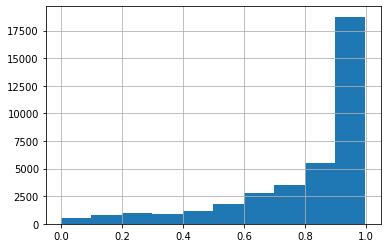

In [14]:
preds_pd[preds_pd['label']==True].predictions_proba_roberta_large.hist()

In [74]:
preds_pd[(preds_pd['language']=='en')].iloc[200:250]

,topic_id,content_id,topic_title,content_title,language,fold,predictions_proba_svm,predictions_proba_xgb,predictions_proba_roberta_large,predictions_proba_roberta_base,label
700,t_007a41ee336d,c_1ae8805d8fe1,Definite Article,Definite Articles,en,0,0.919790,0.991775,0.952143,0.988921,True
701,t_007a41ee336d,c_bf1c34747494,Definite Article,The definite article,en,0,0.763671,0.960084,0.711118,0.940458,False
702,t_007a41ee336d,c_54384824bc83,Definite Article,Article,en,0,0.695077,0.656971,0.461248,0.145006,False
703,t_007a41ee336d,c_852e38e6d0b6,Definite Article,Articles,en,0,0.739565,0.580183,0.393732,0.068524,False
704,t_007a41ee336d,c_5ac40d916b94,Definite Article,Introduction to Articles,en,0,0.743101,0.896171,0.406970,0.083121,False
705,t_007a41ee336d,c_690f3caa8583,Definite Article,Definite and indefinite articles,en,0,0.373201,0.050855,0.456606,0.645550,False
706,t_007a41ee336d,c_03f198b1a62a,Definite Article,Indefinite articles,en,0,0.638831,0.533355,0.108801,0.760094,False
707,t_007a41ee336d,c_9e663f4d3e7c,Definite Article,Indefinite Articles,en,0,0.638831,0.533355,0.142788,0.910242,False
708,t_007a41ee336d,c_f6f8618be77b,Definite Article,News articles,en,0,0.536573,0.612458,0.059831,0.058792,False
709,t_007a41ee336d,c_91f868d13a5c,Definite Article,Articles Exercise,en,0,0.295280,0.016205,0.085189,0.005300,False


In [14]:
def concat_submission(result_list):
    df_test = pd.concat(result_list)
    df_test.fillna("", inplace = True)
    df_test['content_ids'] = df_test['content_ids'].apply(lambda c: c.split(' '))
    df_test = df_test.explode('content_ids').groupby(['topic_id'])['content_ids'].unique().reset_index()
    df_test['content_ids'] = df_test['content_ids'].apply(lambda c: ' '.join(c))
    return df_test
def calc_f2_score(true_ids, pred_ids):
  true_positives = len(set(true_ids)&set(pred_ids))
  false_positives = len(set(pred_ids)-set(true_ids))
  false_negatives = len(set(true_ids)-set(pred_ids))

  beta = 2
  f2_score = ((1+beta**2)*true_positives)/((1+beta**2)*true_positives + beta**2*false_negatives + false_positives)
  return f2_score

def calc_f2_score_mean(target_df, pred_df):
  shape = target_df.shape
  score = [calc_f2_score(target_df.loc[i, 'content_ids'].split(), pred_df.loc[i, 'content_ids'].split()) for i in range(shape[0])]
  target_df['f2_score'] = score
  return target_df['f2_score'].mean()

In [25]:
import tqdm
import pandas as pd
import polars as pl
import numpy as np
def ensemble_postprocess_2(df, threshold:float = 0.8, 
                           columns:list = ['predictions_proba_svm','predictions_proba_roberta_base', 'predictions_proba_roberta_large', 'predictions_proba_xgb'], 
                           weight:np.array = np.array([0.25, 0.25, 0.25, 0.25]), top_n: int = 5):
    weight = weight / sum(weight)
    df['predictions_proba'] = sum([df[columns[i]] * weight[i] for i  in range(len(columns))])
    out_df = df.copy()
    out_df.loc[:,'pred'] = 0
    out_df.loc[df['predictions_proba']>threshold, 'pred'] = 1
    result = []
    grouped_df = out_df.groupby('topic_id')
    for idx, df_ in tqdm.tqdm(grouped_df, total=len(grouped_df)):
        if df_.pred.sum()==0:
            res_df = df_.iloc[:top_n]
        else:
            res_df = df_[df_.pred==1]
        result.append(res_df.loc[:,['topic_id', 'content_id']])
    result = pd.concat(result, axis=0)
    result = pd.DataFrame(result.groupby('topic_id').apply(lambda x:' '.join(x.content_id)))
    result =result.reset_index().rename(columns={0:'content_ids'})
    result['content_ids'] = result['content_ids'].apply(lambda x:' '.join(x.split(' ')))
    return result
correlations_df = pl.read_csv('/root/workspace/Learning_Equality/data/row/correlations.csv')
correlations_df = correlations_df.to_pandas()
preds1 = pl.read_csv('/root/workspace/Learning_Equality/ensemble_3S1-5S2/oof_df_all-MiniLM-L6-v2.csv')
preds2= pl.read_csv( '/root/workspace/Learning_Equality/ensemble_3S1-5S2/oof_df_paraphrase-multilingual-mpnet-base-v2.csv')
preds3 = pl.read_csv( '/root/workspace/Learning_Equality/ensemble_3S1-5S2/oof_df_all-mpnet-base-v2.csv')
preds1= preds1.to_pandas()
preds2= preds2.to_pandas()
preds3= preds3.to_pandas()
preds1 = preds1[preds1['language']!='en']
preds2 = preds2[preds2['language']!='en']
preds3 = preds3[preds3['language']!='en']
def objective(trial):
    threhold_list = {
    'threhold1':trial.suggest_float('threhold1', 0.5, 1),
    'threhold2':trial.suggest_float('threhold2', 0.5, 1),
    'threhold3':trial.suggest_float('threhold3', 0.5, 1),
    }
    weight_list = {
    'weight1':trial.suggest_float('weight1', 0, 0.6),
    'weight2':trial.suggest_float('weight2', 0., 0.6),
    'weight3':trial.suggest_float('weight3', 0, 0.6),
    # 'weight4':trial.suggest_float('weight4', 0, 0.6),
    }
    print(np.array(weight_list.values()))
    result1 = ensemble_postprocess_2(preds1, weight= np.array(list(weight_list.values())), columns = ['predictions_proba_svm','predictions_proba_roberta_base', 'predictions_proba_xgb'],
                threshold=threhold_list['threhold1'], top_n = 1)
    result2 = ensemble_postprocess_2(preds2,  weight= np.array(list(weight_list.values())), columns = ['predictions_proba_svm','predictions_proba_roberta_base', 'predictions_proba_xgb'],
                    threshold=threhold_list['threhold2'], top_n = 1)
    result3 = ensemble_postprocess_2(preds3,  weight= np.array(list(weight_list.values())), columns = ['predictions_proba_svm','predictions_proba_roberta_base', 'predictions_proba_xgb'],
                    threshold=threhold_list['threhold3'], top_n = 1)
    submission_df = concat_submission([result1, result2, result3])
    target_df = correlations_df[correlations_df.topic_id.isin(preds1.topic_id)].reset_index(drop=True)
    score = calc_f2_score_mean(target_df, submission_df)
    return score

In [26]:
import optuna
study = optuna.create_study(direction="maximize") 
study.optimize(objective, 100)

[I 2023-03-12 09:25:20,205] A new study created in memory with name: no-name-a56a1727-58b7-4c59-be91-06f61feea2bc


dict_values([0.04977881676240461, 0.5466094368731014, 0.49763586053661074])


100%|██████████| 6748/6748 [00:06<00:00, 1104.59it/s]
[I 2023-03-12 09:25:40,931] Trial 0 finished with value: 0.4313060147284794 and parameters: {'threhold1': 0.5450819068010138, 'threhold2': 0.9924582592975384, 'threhold3': 0.8093390680024231, 'weight1': 0.04977881676240461, 'weight2': 0.5466094368731014, 'weight3': 0.49763586053661074}. Best is trial 0 with value: 0.4313060147284794.


dict_values([0.06279322889112601, 0.41948438036156915, 0.14568858151915623])


100%|██████████| 6748/6748 [00:06<00:00, 1078.91it/s]
[I 2023-03-12 09:26:03,331] Trial 1 finished with value: 0.4447173212531549 and parameters: {'threhold1': 0.5442458490581918, 'threhold2': 0.7938732124358174, 'threhold3': 0.7684730652324603, 'weight1': 0.06279322889112601, 'weight2': 0.41948438036156915, 'weight3': 0.14568858151915623}. Best is trial 1 with value: 0.4447173212531549.


dict_values([0.5250276960318123, 0.055907171140877954, 0.15611885157951313])


100%|██████████| 6748/6748 [00:06<00:00, 1082.64it/s]
[I 2023-03-12 09:26:25,855] Trial 2 finished with value: 0.4278843308525712 and parameters: {'threhold1': 0.5149049285299641, 'threhold2': 0.7469317393807022, 'threhold3': 0.704687033433717, 'weight1': 0.5250276960318123, 'weight2': 0.055907171140877954, 'weight3': 0.15611885157951313}. Best is trial 1 with value: 0.4447173212531549.


dict_values([0.47340003862706326, 0.34987958523641777, 0.5812659742272772])


100%|██████████| 6748/6748 [00:06<00:00, 993.34it/s] 
[I 2023-03-12 09:26:49,331] Trial 3 finished with value: 0.46144299130962596 and parameters: {'threhold1': 0.7137544519980854, 'threhold2': 0.6264479057166119, 'threhold3': 0.5075754137521815, 'weight1': 0.47340003862706326, 'weight2': 0.34987958523641777, 'weight3': 0.5812659742272772}. Best is trial 3 with value: 0.46144299130962596.


dict_values([0.14062728831949062, 0.05550009499805264, 0.3202292413040939])


100%|██████████| 6748/6748 [00:05<00:00, 1227.64it/s]
[I 2023-03-12 09:27:11,320] Trial 4 finished with value: 0.42841214337993666 and parameters: {'threhold1': 0.5415080829797418, 'threhold2': 0.6059926373767904, 'threhold3': 0.9033761364380639, 'weight1': 0.14062728831949062, 'weight2': 0.05550009499805264, 'weight3': 0.3202292413040939}. Best is trial 3 with value: 0.46144299130962596.


dict_values([0.060915178872488936, 0.5490494258848296, 0.3741100661693924])


100%|██████████| 6748/6748 [00:06<00:00, 1039.65it/s]
[I 2023-03-12 09:27:33,564] Trial 5 finished with value: 0.46971335405030873 and parameters: {'threhold1': 0.6412987722191332, 'threhold2': 0.8704394092750265, 'threhold3': 0.5937716538783055, 'weight1': 0.060915178872488936, 'weight2': 0.5490494258848296, 'weight3': 0.3741100661693924}. Best is trial 5 with value: 0.46971335405030873.


dict_values([0.3366038015636222, 0.3559965843125379, 0.327796100446761])


100%|██████████| 6748/6748 [00:06<00:00, 1089.84it/s]
[I 2023-03-12 09:27:55,678] Trial 6 finished with value: 0.48656060150557695 and parameters: {'threhold1': 0.7578129305360418, 'threhold2': 0.7599542845673777, 'threhold3': 0.8034019866362538, 'weight1': 0.3366038015636222, 'weight2': 0.3559965843125379, 'weight3': 0.327796100446761}. Best is trial 6 with value: 0.48656060150557695.


dict_values([0.37762501737199866, 0.06592060325824996, 0.5571135473347348])


100%|██████████| 6748/6748 [00:04<00:00, 1374.19it/s]
[I 2023-03-12 09:28:16,520] Trial 7 finished with value: 0.45868100605202455 and parameters: {'threhold1': 0.681612626546025, 'threhold2': 0.7100625925862343, 'threhold3': 0.9903740312324849, 'weight1': 0.37762501737199866, 'weight2': 0.06592060325824996, 'weight3': 0.5571135473347348}. Best is trial 6 with value: 0.48656060150557695.


dict_values([0.09080586928106035, 0.5285855827402468, 0.31141186334557064])


100%|██████████| 6748/6748 [00:06<00:00, 1123.56it/s]
[I 2023-03-12 09:28:36,005] Trial 8 finished with value: 0.405346379960417 and parameters: {'threhold1': 0.9713031853112128, 'threhold2': 0.9649539133471422, 'threhold3': 0.8689968631458889, 'weight1': 0.09080586928106035, 'weight2': 0.5285855827402468, 'weight3': 0.31141186334557064}. Best is trial 6 with value: 0.48656060150557695.


dict_values([0.41478316079528377, 0.04873861492343112, 0.12436942909632402])


100%|██████████| 6748/6748 [00:05<00:00, 1233.75it/s]
[I 2023-03-12 09:28:58,030] Trial 9 finished with value: 0.4591423810649173 and parameters: {'threhold1': 0.8077909366167684, 'threhold2': 0.5290177674556971, 'threhold3': 0.8143367306340348, 'weight1': 0.41478316079528377, 'weight2': 0.04873861492343112, 'weight3': 0.12436942909632402}. Best is trial 6 with value: 0.48656060150557695.


dict_values([0.256927924248545, 0.22024640383582247, 0.033804816174589025])


100%|██████████| 6748/6748 [00:06<00:00, 1078.77it/s]
[I 2023-03-12 09:29:19,475] Trial 10 finished with value: 0.48218092750838837 and parameters: {'threhold1': 0.8115489593640256, 'threhold2': 0.8530729501981523, 'threhold3': 0.7071673296875598, 'weight1': 0.256927924248545, 'weight2': 0.22024640383582247, 'weight3': 0.033804816174589025}. Best is trial 6 with value: 0.48656060150557695.


dict_values([0.2658900568585353, 0.21422618607918076, 0.014860168170142397])


100%|██████████| 6748/6748 [00:06<00:00, 1051.86it/s]
[I 2023-03-12 09:29:40,874] Trial 11 finished with value: 0.4855885578874286 and parameters: {'threhold1': 0.8137982836721996, 'threhold2': 0.8492688607642304, 'threhold3': 0.6766329515989155, 'weight1': 0.2658900568585353, 'weight2': 0.21422618607918076, 'weight3': 0.014860168170142397}. Best is trial 6 with value: 0.48656060150557695.


dict_values([0.2727920206374356, 0.23704770821211188, 0.0011187478966089535])


100%|██████████| 6748/6748 [00:06<00:00, 1059.63it/s]
[I 2023-03-12 09:30:02,195] Trial 12 finished with value: 0.48737539351607856 and parameters: {'threhold1': 0.8052281092336476, 'threhold2': 0.8403076578659099, 'threhold3': 0.6535192596597941, 'weight1': 0.2727920206374356, 'weight2': 0.23704770821211188, 'weight3': 0.0011187478966089535}. Best is trial 12 with value: 0.48737539351607856.


dict_values([0.5965584645032292, 0.28926739031477183, 0.22569647704578472])


100%|██████████| 6748/6748 [00:07<00:00, 954.58it/s] 
[I 2023-03-12 09:30:25,124] Trial 13 finished with value: 0.4954442878256849 and parameters: {'threhold1': 0.8989872375600132, 'threhold2': 0.7272817439010506, 'threhold3': 0.6268124532853687, 'weight1': 0.5965584645032292, 'weight2': 0.28926739031477183, 'weight3': 0.22569647704578472}. Best is trial 13 with value: 0.4954442878256849.


dict_values([0.587555234632053, 0.2490096710359011, 0.2293171629427691])


100%|██████████| 6748/6748 [00:06<00:00, 1017.29it/s]
[I 2023-03-12 09:30:47,247] Trial 14 finished with value: 0.49438585989030204 and parameters: {'threhold1': 0.9184941051763377, 'threhold2': 0.6796189138144122, 'threhold3': 0.6329753247863154, 'weight1': 0.587555234632053, 'weight2': 0.2490096710359011, 'weight3': 0.2293171629427691}. Best is trial 13 with value: 0.4954442878256849.


dict_values([0.5945519466812305, 0.1451392131220785, 0.2354167461705509])


100%|██████████| 6748/6748 [00:06<00:00, 972.15it/s] 
[I 2023-03-12 09:31:09,920] Trial 15 finished with value: 0.47953866367739345 and parameters: {'threhold1': 0.9289075006796533, 'threhold2': 0.6869885684880411, 'threhold3': 0.5950032578751479, 'weight1': 0.5945519466812305, 'weight2': 0.1451392131220785, 'weight3': 0.2354167461705509}. Best is trial 13 with value: 0.4954442878256849.


dict_values([0.5990231774460547, 0.2965116787734245, 0.24857254469550244])


100%|██████████| 6748/6748 [00:06<00:00, 964.84it/s] 
[I 2023-03-12 09:31:32,738] Trial 16 finished with value: 0.4984046466076499 and parameters: {'threhold1': 0.901391694468077, 'threhold2': 0.6586522899342494, 'threhold3': 0.6100974356196667, 'weight1': 0.5990231774460547, 'weight2': 0.2965116787734245, 'weight3': 0.24857254469550244}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.5135813986161224, 0.31310219863159877, 0.42249882975960595])


100%|██████████| 6748/6748 [00:07<00:00, 955.85it/s] 
[I 2023-03-12 09:31:56,045] Trial 17 finished with value: 0.47931774481132705 and parameters: {'threhold1': 0.8908349124230348, 'threhold2': 0.6295803204217946, 'threhold3': 0.5273055169800975, 'weight1': 0.5135813986161224, 'weight2': 0.31310219863159877, 'weight3': 0.42249882975960595}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.4501034306429772, 0.41401690083875875, 0.24550706978454137])


100%|██████████| 6748/6748 [00:07<00:00, 958.96it/s] 
[I 2023-03-12 09:32:18,558] Trial 18 finished with value: 0.47851971491211576 and parameters: {'threhold1': 0.9711671179791748, 'threhold2': 0.5306108585178826, 'threhold3': 0.5614199153087069, 'weight1': 0.4501034306429772, 'weight2': 0.41401690083875875, 'weight3': 0.24550706978454137}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.5463621674589086, 0.1508667305366165, 0.39395606452921195])


100%|██████████| 6748/6748 [00:06<00:00, 1018.65it/s]
[I 2023-03-12 09:32:40,764] Trial 19 finished with value: 0.48113496105808695 and parameters: {'threhold1': 0.8758639793228554, 'threhold2': 0.6677605410288036, 'threhold3': 0.619880184446733, 'weight1': 0.5463621674589086, 'weight2': 0.1508667305366165, 'weight3': 0.39395606452921195}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.4914772344174658, 0.2656429095699378, 0.2632204882075759])


100%|██████████| 6748/6748 [00:06<00:00, 970.00it/s] 
[I 2023-03-12 09:33:02,721] Trial 20 finished with value: 0.4837183172656687 and parameters: {'threhold1': 0.9990140934266618, 'threhold2': 0.5738749705872126, 'threhold3': 0.5724571371027477, 'weight1': 0.4914772344174658, 'weight2': 0.2656429095699378, 'weight3': 0.2632204882075759}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.5948262156710828, 0.2908186686135394, 0.2048681778128023])


100%|██████████| 6748/6748 [00:06<00:00, 975.88it/s] 
[I 2023-03-12 09:33:24,799] Trial 21 finished with value: 0.49780888226862474 and parameters: {'threhold1': 0.8974072757550808, 'threhold2': 0.6699872697335162, 'threhold3': 0.6386675622750857, 'weight1': 0.5948262156710828, 'weight2': 0.2908186686135394, 'weight3': 0.2048681778128023}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.5947057971282302, 0.30157677547016654, 0.1855783007221613])


100%|██████████| 6748/6748 [00:06<00:00, 990.40it/s] 
[I 2023-03-12 09:33:47,260] Trial 22 finished with value: 0.49754717923481934 and parameters: {'threhold1': 0.8583569677793678, 'threhold2': 0.7212832643954344, 'threhold3': 0.6309357440858657, 'weight1': 0.5947057971282302, 'weight2': 0.30157677547016654, 'weight3': 0.1855783007221613}. Best is trial 16 with value: 0.4984046466076499.


dict_values([0.551798522170396, 0.32717849481541444, 0.1779129494111758])


100%|██████████| 6748/6748 [00:06<00:00, 1071.66it/s]
[I 2023-03-12 09:34:09,318] Trial 23 finished with value: 0.499472971292453 and parameters: {'threhold1': 0.8638162486990794, 'threhold2': 0.6741195588886005, 'threhold3': 0.6821297315592691, 'weight1': 0.551798522170396, 'weight2': 0.32717849481541444, 'weight3': 0.1779129494111758}. Best is trial 23 with value: 0.499472971292453.


dict_values([0.5447932331430317, 0.36825371623047143, 0.09593553053274398])


100%|██████████| 6748/6748 [00:06<00:00, 1023.26it/s]
[I 2023-03-12 09:34:32,039] Trial 24 finished with value: 0.5010331520466652 and parameters: {'threhold1': 0.8543399673125015, 'threhold2': 0.6536649489744232, 'threhold3': 0.6804047679239659, 'weight1': 0.5447932331430317, 'weight2': 0.36825371623047143, 'weight3': 0.09593553053274398}. Best is trial 24 with value: 0.5010331520466652.


dict_values([0.5241481111928926, 0.4194706446869763, 0.0971510261433703])


100%|██████████| 6748/6748 [00:06<00:00, 1079.36it/s]
[I 2023-03-12 09:34:54,228] Trial 25 finished with value: 0.5027096074341544 and parameters: {'threhold1': 0.85546298819151, 'threhold2': 0.6467422884061437, 'threhold3': 0.6996327494278463, 'weight1': 0.5241481111928926, 'weight2': 0.4194706446869763, 'weight3': 0.0971510261433703}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.43996322507495467, 0.4525470221126056, 0.09191691519745475])


100%|██████████| 6748/6748 [00:06<00:00, 1046.38it/s]
[I 2023-03-12 09:35:16,582] Trial 26 finished with value: 0.49492858929945605 and parameters: {'threhold1': 0.851137696093484, 'threhold2': 0.5860799893361087, 'threhold3': 0.7287391398895166, 'weight1': 0.43996322507495467, 'weight2': 0.4525470221126056, 'weight3': 0.09191691519745475}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.5304592392637489, 0.47955010068075055, 0.07202347327860101])


100%|██████████| 6748/6748 [00:06<00:00, 1028.82it/s]
[I 2023-03-12 09:35:38,991] Trial 27 finished with value: 0.5020424205492464 and parameters: {'threhold1': 0.8540271462990197, 'threhold2': 0.633360644809487, 'threhold3': 0.6799272474055286, 'weight1': 0.5304592392637489, 'weight2': 0.47955010068075055, 'weight3': 0.07202347327860101}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.48722859017110204, 0.5965787994110414, 0.08370745361603096])


100%|██████████| 6748/6748 [00:06<00:00, 1099.86it/s]
[I 2023-03-12 09:36:01,509] Trial 28 finished with value: 0.4798371686764342 and parameters: {'threhold1': 0.7723888330012393, 'threhold2': 0.5656507100608538, 'threhold3': 0.7489805704756474, 'weight1': 0.48722859017110204, 'weight2': 0.5965787994110414, 'weight3': 0.08370745361603096}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.535019640164458, 0.47238498521088795, 0.07659318348657684])


100%|██████████| 6748/6748 [00:06<00:00, 1042.72it/s]
[I 2023-03-12 09:36:24,150] Trial 29 finished with value: 0.46699094041822087 and parameters: {'threhold1': 0.8531199760336429, 'threhold2': 0.5030636508806365, 'threhold3': 0.674196547960517, 'weight1': 0.535019640164458, 'weight2': 0.47238498521088795, 'weight3': 0.07659318348657684}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.4265683984375859, 0.38051117579694976, 0.052146242861394826])


100%|██████████| 6748/6748 [00:06<00:00, 1046.69it/s]
[I 2023-03-12 09:36:45,868] Trial 30 finished with value: 0.5006173654985113 and parameters: {'threhold1': 0.9454861079035723, 'threhold2': 0.6277747811654873, 'threhold3': 0.7067705823783512, 'weight1': 0.4265683984375859, 'weight2': 0.38051117579694976, 'weight3': 0.052146242861394826}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.4967014109556123, 0.40313752976526845, 0.05061745226810377])


100%|██████████| 6748/6748 [00:06<00:00, 1046.91it/s]
[I 2023-03-12 09:37:08,110] Trial 31 finished with value: 0.49994904579326405 and parameters: {'threhold1': 0.9336925273371051, 'threhold2': 0.6296750220772506, 'threhold3': 0.7157087668618105, 'weight1': 0.4967014109556123, 'weight2': 0.40313752976526845, 'weight3': 0.05061745226810377}. Best is trial 25 with value: 0.5027096074341544.


dict_values([0.4421117774214644, 0.39988485223549725, 0.12310681435840413])


100%|██████████| 6748/6748 [00:06<00:00, 1079.58it/s]
[I 2023-03-12 09:37:30,073] Trial 32 finished with value: 0.5028070786669492 and parameters: {'threhold1': 0.8362025652962631, 'threhold2': 0.6426039502412388, 'threhold3': 0.7453429825503518, 'weight1': 0.4421117774214644, 'weight2': 0.39988485223549725, 'weight3': 0.12310681435840413}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.5447255221821498, 0.448459737178415, 0.12858134204641555])


100%|██████████| 6748/6748 [00:06<00:00, 1112.31it/s]
[I 2023-03-12 09:37:52,034] Trial 33 finished with value: 0.4992908269180583 and parameters: {'threhold1': 0.8291071771622236, 'threhold2': 0.6017518383385188, 'threhold3': 0.7569478592357342, 'weight1': 0.5447255221821498, 'weight2': 0.448459737178415, 'weight3': 0.12858134204641555}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.46267282183671093, 0.3571207164876451, 0.11574704676825723])


100%|██████████| 6748/6748 [00:06<00:00, 1019.01it/s]
[I 2023-03-12 09:38:14,738] Trial 34 finished with value: 0.5000922812863107 and parameters: {'threhold1': 0.7740991944460616, 'threhold2': 0.645218046849562, 'threhold3': 0.665730203745923, 'weight1': 0.46267282183671093, 'weight2': 0.3571207164876451, 'weight3': 0.11574704676825723}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.5166182509615013, 0.3922131125297816, 0.15172031037306058])


100%|██████████| 6748/6748 [00:06<00:00, 1089.80it/s]
[I 2023-03-12 09:38:36,632] Trial 35 finished with value: 0.49719880588785614 and parameters: {'threhold1': 0.8340520211413143, 'threhold2': 0.6999982666790454, 'threhold3': 0.7334787021843524, 'weight1': 0.5166182509615013, 'weight2': 0.3922131125297816, 'weight3': 0.15172031037306058}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.4868104707328619, 0.49580584123118865, 0.16869969169235388])


100%|██████████| 6748/6748 [00:06<00:00, 1081.63it/s]
[I 2023-03-12 09:38:58,580] Trial 36 finished with value: 0.49967014365396634 and parameters: {'threhold1': 0.8776010175429649, 'threhold2': 0.6050845650588472, 'threhold3': 0.7808249331117136, 'weight1': 0.4868104707328619, 'weight2': 0.49580584123118865, 'weight3': 0.16869969169235388}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.4020337691728769, 0.44149462783473825, 0.09802104238332385])


100%|██████████| 6748/6748 [00:06<00:00, 1059.52it/s]
[I 2023-03-12 09:39:20,862] Trial 37 finished with value: 0.49707113773479655 and parameters: {'threhold1': 0.7376728978292074, 'threhold2': 0.6519104916961262, 'threhold3': 0.6960655673499708, 'weight1': 0.4020337691728769, 'weight2': 0.44149462783473825, 'weight3': 0.09802104238332385}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.45713174758186875, 0.4173723247232779, 0.1451440985806877])


100%|██████████| 6748/6748 [00:06<00:00, 1044.33it/s]
[I 2023-03-12 09:39:43,612] Trial 38 finished with value: 0.4973137134498628 and parameters: {'threhold1': 0.7834897573987926, 'threhold2': 0.7492717184567647, 'threhold3': 0.6618867308214519, 'weight1': 0.45713174758186875, 'weight2': 0.4173723247232779, 'weight3': 0.1451440985806877}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.5546643408588839, 0.37663548006126424, 0.06459376022525902])


100%|██████████| 6748/6748 [00:06<00:00, 1123.05it/s]
[I 2023-03-12 09:40:04,919] Trial 39 finished with value: 0.49390789408785885 and parameters: {'threhold1': 0.8369129232301497, 'threhold2': 0.6998216135110189, 'threhold3': 0.7396474969227698, 'weight1': 0.5546643408588839, 'weight2': 0.37663548006126424, 'weight3': 0.06459376022525902}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.5122945272577232, 0.48811096019738764, 0.03178179963277264])


100%|██████████| 6748/6748 [00:06<00:00, 1119.12it/s]
[I 2023-03-12 09:40:27,321] Trial 40 finished with value: 0.4929683877970701 and parameters: {'threhold1': 0.7353111377697176, 'threhold2': 0.6476021629336957, 'threhold3': 0.7769612853060915, 'weight1': 0.5122945272577232, 'weight2': 0.48811096019738764, 'weight3': 0.03178179963277264}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.41294579203494636, 0.3782891239675217, 0.05448700047010902])


100%|██████████| 6748/6748 [00:06<00:00, 1035.26it/s]
[I 2023-03-12 09:40:49,284] Trial 41 finished with value: 0.49992079322257477 and parameters: {'threhold1': 0.8747955273670771, 'threhold2': 0.6167106769923385, 'threhold3': 0.7034772835166607, 'weight1': 0.41294579203494636, 'weight2': 0.3782891239675217, 'weight3': 0.05448700047010902}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.3664447835948929, 0.3369029572476144, 0.09709278446247688])


100%|██████████| 6748/6748 [00:06<00:00, 1057.32it/s]
[I 2023-03-12 09:41:11,131] Trial 42 finished with value: 0.5024517550095479 and parameters: {'threhold1': 0.9417165985393893, 'threhold2': 0.6375199433114345, 'threhold3': 0.7176017936453215, 'weight1': 0.3664447835948929, 'weight2': 0.3369029572476144, 'weight3': 0.09709278446247688}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.3476168051246477, 0.3313669792616702, 0.0985736190585358])


100%|██████████| 6748/6748 [00:06<00:00, 1047.21it/s]
[I 2023-03-12 09:41:33,012] Trial 43 finished with value: 0.4969501515178049 and parameters: {'threhold1': 0.9136184315356339, 'threhold2': 0.5873430830300932, 'threhold3': 0.7258488124594488, 'weight1': 0.3476168051246477, 'weight2': 0.3313669792616702, 'weight3': 0.0985736190585358}. Best is trial 32 with value: 0.5028070786669492.


dict_values([0.4639606402811577, 0.42828773759854144, 0.12419336659747013])


100%|██████████| 6748/6748 [00:06<00:00, 1039.70it/s]
[I 2023-03-12 09:41:55,629] Trial 44 finished with value: 0.5040496364560092 and parameters: {'threhold1': 0.8355433795948928, 'threhold2': 0.6501772923088199, 'threhold3': 0.6790793649487584, 'weight1': 0.4639606402811577, 'weight2': 0.42828773759854144, 'weight3': 0.12419336659747013}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.38675214767201727, 0.42821739865948927, 0.13669364596259206])


100%|██████████| 6748/6748 [00:06<00:00, 1082.60it/s]
[I 2023-03-12 09:42:17,699] Trial 45 finished with value: 0.4992500642904815 and parameters: {'threhold1': 0.8014520058088482, 'threhold2': 0.6973952774250319, 'threhold3': 0.7607478912530593, 'weight1': 0.38675214767201727, 'weight2': 0.42821739865948927, 'weight3': 0.13669364596259206}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.47041257546270615, 0.4026934711586971, 0.0011151107086729006])


100%|██████████| 6748/6748 [00:06<00:00, 1014.37it/s]
[I 2023-03-12 09:42:40,426] Trial 46 finished with value: 0.49613221268446406 and parameters: {'threhold1': 0.8337769118147149, 'threhold2': 0.7225823030613313, 'threhold3': 0.6513368339996672, 'weight1': 0.47041257546270615, 'weight2': 0.4026934711586971, 'weight3': 0.0011151107086729006}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.4276752636202195, 0.34605117749502406, 0.11927751380933027])


100%|██████████| 6748/6748 [00:06<00:00, 1024.37it/s]
[I 2023-03-12 09:43:01,617] Trial 47 finished with value: 0.4877304906373702 and parameters: {'threhold1': 0.9449665343225873, 'threhold2': 0.7692240917396703, 'threhold3': 0.6931976778008055, 'weight1': 0.4276752636202195, 'weight2': 0.34605117749502406, 'weight3': 0.11927751380933027}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.36306876628853285, 0.5195861676152524, 0.024404119799131554])


100%|██████████| 6748/6748 [00:06<00:00, 1070.38it/s]
[I 2023-03-12 09:43:24,863] Trial 48 finished with value: 0.483891445664209 and parameters: {'threhold1': 0.7952237355708919, 'threhold2': 0.61373923275228, 'threhold3': 0.7130941732531416, 'weight1': 0.36306876628853285, 'weight2': 0.5195861676152524, 'weight3': 0.024404119799131554}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.44932127347122247, 0.42699896582135355, 0.14744168909207445])


100%|██████████| 6748/6748 [00:05<00:00, 1192.33it/s]
[I 2023-03-12 09:43:46,534] Trial 49 finished with value: 0.4976778032122933 and parameters: {'threhold1': 0.8240631096813649, 'threhold2': 0.6896999991226322, 'threhold3': 0.8239876680328039, 'weight1': 0.44932127347122247, 'weight2': 0.42699896582135355, 'weight3': 0.14744168909207445}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.3175603615384501, 0.4618741621046298, 0.0688736082398822])


100%|██████████| 6748/6748 [00:06<00:00, 1029.82it/s]
[I 2023-03-12 09:44:09,107] Trial 50 finished with value: 0.4953009796273263 and parameters: {'threhold1': 0.8858406115856028, 'threhold2': 0.640112144286703, 'threhold3': 0.6504910940648693, 'weight1': 0.3175603615384501, 'weight2': 0.4618741621046298, 'weight3': 0.0688736082398822}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.5622528354239862, 0.35351207877096763, 0.11034208372797048])


100%|██████████| 6748/6748 [00:06<00:00, 1079.63it/s]
[I 2023-03-12 09:44:31,098] Trial 51 finished with value: 0.5004077799715642 and parameters: {'threhold1': 0.8549490831401494, 'threhold2': 0.658956147662124, 'threhold3': 0.6823078115747525, 'weight1': 0.5622528354239862, 'weight2': 0.35351207877096763, 'weight3': 0.11034208372797048}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.5107862429851963, 0.43699531791416857, 0.0811552882421531])


100%|██████████| 6748/6748 [00:06<00:00, 1078.94it/s]
[I 2023-03-12 09:44:52,702] Trial 52 finished with value: 0.5015382519151348 and parameters: {'threhold1': 0.9114304107273833, 'threhold2': 0.6368750217111222, 'threhold3': 0.7236455174041684, 'weight1': 0.5107862429851963, 'weight2': 0.43699531791416857, 'weight3': 0.0811552882421531}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.5139788632526762, 0.4382534496911189, 0.03185932611744963])


100%|██████████| 6748/6748 [00:06<00:00, 1099.04it/s]
[I 2023-03-12 09:45:14,120] Trial 53 finished with value: 0.49915361029982075 and parameters: {'threhold1': 0.8945142968698129, 'threhold2': 0.6336753261489527, 'threhold3': 0.7424710887851472, 'weight1': 0.5139788632526762, 'weight2': 0.4382534496911189, 'weight3': 0.03185932611744963}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.4716774611471878, 0.4016681251570878, 0.16404786804053845])


100%|██████████| 6748/6748 [00:06<00:00, 1039.06it/s]
[I 2023-03-12 09:45:36,140] Trial 54 finished with value: 0.5014824918858427 and parameters: {'threhold1': 0.9127322612799649, 'threhold2': 0.6764105846969374, 'threhold3': 0.7136481751792111, 'weight1': 0.4716774611471878, 'weight2': 0.4016681251570878, 'weight3': 0.16404786804053845}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.3993864291935905, 0.468871416905111, 0.1216432582783455])


100%|██████████| 6748/6748 [00:06<00:00, 1109.22it/s]
[I 2023-03-12 09:45:57,750] Trial 55 finished with value: 0.49820376191130056 and parameters: {'threhold1': 0.8789130056790736, 'threhold2': 0.6093423011903549, 'threhold3': 0.790415585415984, 'weight1': 0.3993864291935905, 'weight2': 0.468871416905111, 'weight3': 0.1216432582783455}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.43372528618936207, 0.41744972028955935, 0.07190867296957722])


100%|██████████| 6748/6748 [00:06<00:00, 1088.64it/s]
[I 2023-03-12 09:46:19,133] Trial 56 finished with value: 0.49754627053438355 and parameters: {'threhold1': 0.9147711889759659, 'threhold2': 0.6782341730678481, 'threhold3': 0.761625686056116, 'weight1': 0.43372528618936207, 'weight2': 0.41744972028955935, 'weight3': 0.07190867296957722}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.5012841567950115, 0.4859584750455749, 0.047200881563638])


100%|██████████| 6748/6748 [00:06<00:00, 1088.84it/s]
[I 2023-03-12 09:46:41,463] Trial 57 finished with value: 0.4805430071464628 and parameters: {'threhold1': 0.8079111726237662, 'threhold2': 0.5562002015472034, 'threhold3': 0.6944486522030456, 'weight1': 0.5012841567950115, 'weight2': 0.4859584750455749, 'weight3': 0.047200881563638}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.575027163606233, 0.3905417684687583, 0.19597029301061641])


100%|██████████| 6748/6748 [00:06<00:00, 1080.80it/s]
[I 2023-03-12 09:47:03,014] Trial 58 finished with value: 0.5007408982729905 and parameters: {'threhold1': 0.903596505984809, 'threhold2': 0.6234751843229343, 'threhold3': 0.7263555627844016, 'weight1': 0.575027163606233, 'weight2': 0.3905417684687583, 'weight3': 0.19597029301061641}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.5205411436912859, 0.4446982028027366, 0.08758363317771058])


100%|██████████| 6748/6748 [00:06<00:00, 1050.34it/s]
[I 2023-03-12 09:47:24,489] Trial 59 finished with value: 0.49663397701809936 and parameters: {'threhold1': 0.9574918260611609, 'threhold2': 0.5966386976649569, 'threhold3': 0.6640059606602213, 'weight1': 0.5205411436912859, 'weight2': 0.4446982028027366, 'weight3': 0.08758363317771058}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.5274631372581345, 0.5116026470201386, 0.012724819273834037])


100%|██████████| 6748/6748 [00:06<00:00, 1071.53it/s]
[I 2023-03-12 09:47:46,238] Trial 60 finished with value: 0.49949201216839534 and parameters: {'threhold1': 0.8677217046002773, 'threhold2': 0.653901845782346, 'threhold3': 0.7472252307032363, 'weight1': 0.5274631372581345, 'weight2': 0.5116026470201386, 'weight3': 0.012724819273834037}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.47214247386654706, 0.4109836025344488, 0.17002529759840726])


100%|██████████| 6748/6748 [00:06<00:00, 1076.86it/s]
[I 2023-03-12 09:48:07,404] Trial 61 finished with value: 0.5011463323312451 and parameters: {'threhold1': 0.9243505159101777, 'threhold2': 0.6706975434356176, 'threhold3': 0.7162303941610588, 'weight1': 0.47214247386654706, 'weight2': 0.4109836025344488, 'weight3': 0.17002529759840726}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.4782735580617332, 0.4621846924096127, 0.15274162280987225])


100%|██████████| 6748/6748 [00:06<00:00, 1053.91it/s]
[I 2023-03-12 09:48:29,036] Trial 62 finished with value: 0.5039291249410336 and parameters: {'threhold1': 0.9107152977211533, 'threhold2': 0.6821713833611492, 'threhold3': 0.6872282398492685, 'weight1': 0.4782735580617332, 'weight2': 0.4621846924096127, 'weight3': 0.15274162280987225}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.485099532931082, 0.47627363768513525, 0.13224506723767981])


100%|██████████| 6748/6748 [00:06<00:00, 1025.95it/s]
[I 2023-03-12 09:48:50,782] Trial 63 finished with value: 0.5027311874362957 and parameters: {'threhold1': 0.9332242254142543, 'threhold2': 0.6342050412581763, 'threhold3': 0.6772055139120535, 'weight1': 0.485099532931082, 'weight2': 0.47627363768513525, 'weight3': 0.13224506723767981}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.44381464981450036, 0.5408275766376515, 0.14883325612190748])


100%|██████████| 6748/6748 [00:06<00:00, 1048.80it/s]
[I 2023-03-12 09:49:12,413] Trial 64 finished with value: 0.4985015999011261 and parameters: {'threhold1': 0.9314582029317816, 'threhold2': 0.6178373898495163, 'threhold3': 0.6439575459182576, 'weight1': 0.44381464981450036, 'weight2': 0.5408275766376515, 'weight3': 0.14883325612190748}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.48760756534787775, 0.4730307800544816, 0.2101324664175571])


100%|██████████| 6748/6748 [00:06<00:00, 1083.42it/s]
[I 2023-03-12 09:49:33,449] Trial 65 finished with value: 0.5029027134061956 and parameters: {'threhold1': 0.9685811450521308, 'threhold2': 0.663158066245556, 'threhold3': 0.6852366294938078, 'weight1': 0.48760756534787775, 'weight2': 0.4730307800544816, 'weight3': 0.2101324664175571}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.4822214535140896, 0.4979179476574068, 0.19221304737073572])


100%|██████████| 6748/6748 [00:06<00:00, 1064.25it/s]
[I 2023-03-12 09:49:54,081] Trial 66 finished with value: 0.5026633577539821 and parameters: {'threhold1': 0.9885437435942578, 'threhold2': 0.661311069869086, 'threhold3': 0.6876404370357628, 'weight1': 0.4822214535140896, 'weight2': 0.4979179476574068, 'weight3': 0.19221304737073572}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.490363742960217, 0.45636239749076163, 0.21223602521786666])


100%|██████████| 6748/6748 [00:06<00:00, 1065.76it/s]
[I 2023-03-12 09:50:14,635] Trial 67 finished with value: 0.4979327559574843 and parameters: {'threhold1': 0.9845919918380057, 'threhold2': 0.7117653255680955, 'threhold3': 0.6936257357833774, 'weight1': 0.490363742960217, 'weight2': 0.45636239749076163, 'weight3': 0.21223602521786666}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.47717628253098887, 0.5034513695912459, 0.18618721908971922])


100%|██████████| 6748/6748 [00:06<00:00, 1027.20it/s]
[I 2023-03-12 09:50:35,619] Trial 68 finished with value: 0.5032077680015005 and parameters: {'threhold1': 0.9651289197469112, 'threhold2': 0.6627122185798731, 'threhold3': 0.6218144921668793, 'weight1': 0.47717628253098887, 'weight2': 0.5034513695912459, 'weight3': 0.18618721908971922}. Best is trial 44 with value: 0.5040496364560092.


dict_values([0.4612989870954505, 0.47027482785086705, 0.2152274967606092])


100%|██████████| 6748/6748 [00:06<00:00, 1030.91it/s]
[I 2023-03-12 09:50:56,865] Trial 69 finished with value: 0.5040684325094519 and parameters: {'threhold1': 0.9644684302736917, 'threhold2': 0.6868873182333001, 'threhold3': 0.6097531442724001, 'weight1': 0.4612989870954505, 'weight2': 0.47027482785086705, 'weight3': 0.2152274967606092}. Best is trial 69 with value: 0.5040684325094519.


dict_values([0.46058823783971475, 0.5099016405881784, 0.20781025200032957])


100%|██████████| 6748/6748 [00:06<00:00, 1057.77it/s]
[I 2023-03-12 09:51:17,913] Trial 70 finished with value: 0.50506165580307 and parameters: {'threhold1': 0.9626301606621246, 'threhold2': 0.6920724347761109, 'threhold3': 0.6421247354553022, 'weight1': 0.46058823783971475, 'weight2': 0.5099016405881784, 'weight3': 0.20781025200032957}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.45994153273139154, 0.509028719811754, 0.21388364603276203])


100%|██████████| 6748/6748 [00:06<00:00, 1034.44it/s]
[I 2023-03-12 09:51:38,710] Trial 71 finished with value: 0.5039281322656889 and parameters: {'threhold1': 0.962349268886121, 'threhold2': 0.6889389770414566, 'threhold3': 0.6242705199824271, 'weight1': 0.45994153273139154, 'weight2': 0.509028719811754, 'weight3': 0.21388364603276203}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4589701557012512, 0.5135549274813713, 0.224124507099753])


100%|██████████| 6748/6748 [00:06<00:00, 1049.97it/s]
[I 2023-03-12 09:51:59,596] Trial 72 finished with value: 0.5017537695793146 and parameters: {'threhold1': 0.9670704680030423, 'threhold2': 0.7294761987249682, 'threhold3': 0.6139585753702672, 'weight1': 0.4589701557012512, 'weight2': 0.5135549274813713, 'weight3': 0.224124507099753}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4221007587103303, 0.527349523859521, 0.18216237642160266])


100%|██████████| 6748/6748 [00:06<00:00, 1008.00it/s]
[I 2023-03-12 09:52:20,820] Trial 73 finished with value: 0.5033319288012009 and parameters: {'threhold1': 0.9559702854373882, 'threhold2': 0.6897505149202342, 'threhold3': 0.6256285279034384, 'weight1': 0.4221007587103303, 'weight2': 0.527349523859521, 'weight3': 0.18216237642160266}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4197542074189913, 0.5565344700825661, 0.26367241905735983])


100%|██████████| 6748/6748 [00:06<00:00, 1049.85it/s]
[I 2023-03-12 09:52:42,265] Trial 74 finished with value: 0.5043786914993604 and parameters: {'threhold1': 0.95292767670939, 'threhold2': 0.6883748105133412, 'threhold3': 0.6323487200654858, 'weight1': 0.4197542074189913, 'weight2': 0.5565344700825661, 'weight3': 0.26367241905735983}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4283384194883536, 0.5531266952994488, 0.2588507969904774])


100%|██████████| 6748/6748 [00:06<00:00, 1006.55it/s]
[I 2023-03-12 09:53:03,504] Trial 75 finished with value: 0.5043189730212101 and parameters: {'threhold1': 0.9568514275175807, 'threhold2': 0.6873498519127276, 'threhold3': 0.6274687367807219, 'weight1': 0.4283384194883536, 'weight2': 0.5531266952994488, 'weight3': 0.2588507969904774}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.42664367809027515, 0.5589635608481233, 0.2790609061209425])


100%|██████████| 6748/6748 [00:06<00:00, 1051.33it/s]
[I 2023-03-12 09:53:24,755] Trial 76 finished with value: 0.5033323493126103 and parameters: {'threhold1': 0.9545544068060635, 'threhold2': 0.6865211255045789, 'threhold3': 0.6004729306423678, 'weight1': 0.42664367809027515, 'weight2': 0.5589635608481233, 'weight3': 0.2790609061209425}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4124300468636768, 0.5540072915552869, 0.2689183333198395])


100%|██████████| 6748/6748 [00:06<00:00, 1013.34it/s]
[I 2023-03-12 09:53:46,123] Trial 77 finished with value: 0.5013777015997641 and parameters: {'threhold1': 0.9549174177541511, 'threhold2': 0.7335530630796012, 'threhold3': 0.5937780832064111, 'weight1': 0.4124300468636768, 'weight2': 0.5540072915552869, 'weight3': 0.2689183333198395}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.44992573499955063, 0.5634183596518317, 0.2894293252689817])


100%|██████████| 6748/6748 [00:06<00:00, 1049.13it/s]
[I 2023-03-12 09:54:06,875] Trial 78 finished with value: 0.5026605680666894 and parameters: {'threhold1': 0.9917478280358257, 'threhold2': 0.7121386655264573, 'threhold3': 0.6050589792599402, 'weight1': 0.44992573499955063, 'weight2': 0.5634183596518317, 'weight3': 0.2894293252689817}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.3892762827868199, 0.5769875732035732, 0.2493107997037506])


100%|██████████| 6748/6748 [00:06<00:00, 1024.53it/s]
[I 2023-03-12 09:54:27,872] Trial 79 finished with value: 0.5032241989746877 and parameters: {'threhold1': 0.9789451866441311, 'threhold2': 0.6849527277631414, 'threhold3': 0.635901026632936, 'weight1': 0.3892762827868199, 'weight2': 0.5769875732035732, 'weight3': 0.2493107997037506}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4216949460952043, 0.5332293980022136, 0.23450241158036994])


100%|██████████| 6748/6748 [00:06<00:00, 1013.19it/s]
[I 2023-03-12 09:54:48,738] Trial 80 finished with value: 0.49897244119049927 and parameters: {'threhold1': 0.9997890184593256, 'threhold2': 0.7052554510112624, 'threhold3': 0.5766228223038267, 'weight1': 0.4216949460952043, 'weight2': 0.5332293980022136, 'weight3': 0.23450241158036994}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4347686572906218, 0.5225687948510437, 0.2179388486858967])


100%|██████████| 6748/6748 [00:06<00:00, 1050.59it/s]
[I 2023-03-12 09:55:10,083] Trial 81 finished with value: 0.5041351302725955 and parameters: {'threhold1': 0.952397146767177, 'threhold2': 0.6873822894084087, 'threhold3': 0.6267898777937906, 'weight1': 0.4347686572906218, 'weight2': 0.5225687948510437, 'weight3': 0.2179388486858967}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.43785170695053877, 0.5453784548099609, 0.21718922337380286])


100%|██████████| 6748/6748 [00:06<00:00, 1041.16it/s]
[I 2023-03-12 09:55:30,992] Trial 82 finished with value: 0.5020762682598675 and parameters: {'threhold1': 0.9748957778440791, 'threhold2': 0.6920616115483939, 'threhold3': 0.6046840010619158, 'weight1': 0.43785170695053877, 'weight2': 0.5453784548099609, 'weight3': 0.21718922337380286}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4639149014723264, 0.5244083041564912, 0.20143013259251544])


100%|██████████| 6748/6748 [00:06<00:00, 1041.20it/s]
[I 2023-03-12 09:55:52,475] Trial 83 finished with value: 0.5044798496970679 and parameters: {'threhold1': 0.9500080090700972, 'threhold2': 0.6781840214426326, 'threhold3': 0.6383834960593352, 'weight1': 0.4639149014723264, 'weight2': 0.5244083041564912, 'weight3': 0.20143013259251544}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4619500570588431, 0.5207705795735666, 0.24573771803153463])


100%|██████████| 6748/6748 [00:06<00:00, 1043.73it/s]
[I 2023-03-12 09:56:14,017] Trial 84 finished with value: 0.5047887431462138 and parameters: {'threhold1': 0.9399490047766088, 'threhold2': 0.7030480311627589, 'threhold3': 0.6401003116087463, 'weight1': 0.4619500570588431, 'weight2': 0.5207705795735666, 'weight3': 0.24573771803153463}. Best is trial 70 with value: 0.50506165580307.


dict_values([0.4581079177537005, 0.5302317153798448, 0.24886594763150657])


100%|██████████| 6748/6748 [00:06<00:00, 1035.64it/s]
[I 2023-03-12 09:56:35,715] Trial 85 finished with value: 0.5052167552825958 and parameters: {'threhold1': 0.9465274530784646, 'threhold2': 0.6742788970530483, 'threhold3': 0.6407275414370033, 'weight1': 0.4581079177537005, 'weight2': 0.5302317153798448, 'weight3': 0.24886594763150657}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.44512429730473285, 0.5296625797137228, 0.2503651450499123])


100%|██████████| 6748/6748 [00:06<00:00, 1061.29it/s]
[I 2023-03-12 09:56:56,953] Trial 86 finished with value: 0.5042224151026576 and parameters: {'threhold1': 0.942317051348472, 'threhold2': 0.7116486967062358, 'threhold3': 0.6399030474261622, 'weight1': 0.44512429730473285, 'weight2': 0.5296625797137228, 'weight3': 0.2503651450499123}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.40614333903812677, 0.5285661077820396, 0.241053146790509])


100%|██████████| 6748/6748 [00:06<00:00, 1020.50it/s]
[I 2023-03-12 09:57:18,514] Trial 87 finished with value: 0.5038419341850249 and parameters: {'threhold1': 0.9446774083049359, 'threhold2': 0.7113949295295687, 'threhold3': 0.635581380811139, 'weight1': 0.40614333903812677, 'weight2': 0.5285661077820396, 'weight3': 0.241053146790509}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.44201237655215664, 0.5750627508353636, 0.26135742984270094])


100%|██████████| 6748/6748 [00:06<00:00, 1002.06it/s]
[I 2023-03-12 09:57:40,182] Trial 88 finished with value: 0.5020373908123424 and parameters: {'threhold1': 0.9255893597145767, 'threhold2': 0.7388389102602463, 'threhold3': 0.6149123967652685, 'weight1': 0.44201237655215664, 'weight2': 0.5750627508353636, 'weight3': 0.26135742984270094}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.5004013739930929, 0.540261225118705, 0.3143872941325543])


100%|██████████| 6748/6748 [00:06<00:00, 1066.05it/s]
[I 2023-03-12 09:58:01,041] Trial 89 finished with value: 0.5032700697806202 and parameters: {'threhold1': 0.9776789790781897, 'threhold2': 0.7220582050584884, 'threhold3': 0.6425731506407352, 'weight1': 0.5004013739930929, 'weight2': 0.540261225118705, 'weight3': 0.3143872941325543}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.45269235284008896, 0.5246749376752003, 0.29713995779764024])


100%|██████████| 6748/6748 [00:06<00:00, 1029.96it/s]
[I 2023-03-12 09:58:22,251] Trial 90 finished with value: 0.5046681106913882 and parameters: {'threhold1': 0.9382996513394274, 'threhold2': 0.7041832128489841, 'threhold3': 0.6565680427702156, 'weight1': 0.45269235284008896, 'weight2': 0.5246749376752003, 'weight3': 0.29713995779764024}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.45446613110622824, 0.523084155279258, 0.2998645999205649])


100%|██████████| 6748/6748 [00:06<00:00, 1063.44it/s]
[I 2023-03-12 09:58:43,484] Trial 91 finished with value: 0.5047950898746519 and parameters: {'threhold1': 0.9416561887224575, 'threhold2': 0.702569539468202, 'threhold3': 0.6544765987409678, 'weight1': 0.45446613110622824, 'weight2': 0.523084155279258, 'weight3': 0.2998645999205649}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.4330107962658575, 0.5241094964205751, 0.2935729464775651])


100%|██████████| 6748/6748 [00:06<00:00, 1044.19it/s]
[I 2023-03-12 09:59:04,859] Trial 92 finished with value: 0.5051364531356374 and parameters: {'threhold1': 0.9355997312437775, 'threhold2': 0.7031052191869251, 'threhold3': 0.6591266870517639, 'weight1': 0.4330107962658575, 'weight2': 0.5241094964205751, 'weight3': 0.2935729464775651}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.41602530407781235, 0.5996902830990684, 0.291672525896557])


100%|██████████| 6748/6748 [00:06<00:00, 1016.40it/s]
[I 2023-03-12 09:59:26,520] Trial 93 finished with value: 0.5044934049828952 and parameters: {'threhold1': 0.9339206585454446, 'threhold2': 0.7026312610783423, 'threhold3': 0.6621895276036022, 'weight1': 0.41602530407781235, 'weight2': 0.5996902830990684, 'weight3': 0.291672525896557}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.40018598075130696, 0.5655458318797434, 0.29679733077369796])


100%|██████████| 6748/6748 [00:06<00:00, 1041.15it/s]
[I 2023-03-12 09:59:47,929] Trial 94 finished with value: 0.5049772530029164 and parameters: {'threhold1': 0.9328628918375291, 'threhold2': 0.6992443443756654, 'threhold3': 0.6574919636722223, 'weight1': 0.40018598075130696, 'weight2': 0.5655458318797434, 'weight3': 0.29679733077369796}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.3941363812705748, 0.5993966284359262, 0.29931282261091635])


100%|██████████| 6748/6748 [00:06<00:00, 1047.66it/s]
[I 2023-03-12 10:00:09,409] Trial 95 finished with value: 0.5042799884539734 and parameters: {'threhold1': 0.923837257771027, 'threhold2': 0.7030424415504569, 'threhold3': 0.658955544717091, 'weight1': 0.3941363812705748, 'weight2': 0.5993966284359262, 'weight3': 0.29931282261091635}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.4153822582278698, 0.583165765146478, 0.33092246257771263])


100%|██████████| 6748/6748 [00:06<00:00, 1041.56it/s]
[I 2023-03-12 10:00:30,694] Trial 96 finished with value: 0.5016390062409014 and parameters: {'threhold1': 0.9344491400390261, 'threhold2': 0.7452076849708706, 'threhold3': 0.6534948106777302, 'weight1': 0.4153822582278698, 'weight2': 0.583165765146478, 'weight3': 0.33092246257771263}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.381725873763685, 0.5661815528311368, 0.2749150556028202])


100%|██████████| 6748/6748 [00:06<00:00, 1063.31it/s]
[I 2023-03-12 10:00:52,267] Trial 97 finished with value: 0.5044247671388321 and parameters: {'threhold1': 0.9029734669019351, 'threhold2': 0.6718341815956914, 'threhold3': 0.6659718374803524, 'weight1': 0.381725873763685, 'weight2': 0.5661815528311368, 'weight3': 0.2749150556028202}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.3802504922697453, 0.5848057224433342, 0.2870380031928277])


100%|██████████| 6748/6748 [00:06<00:00, 1028.66it/s]
[I 2023-03-12 10:01:13,803] Trial 98 finished with value: 0.5043062792769265 and parameters: {'threhold1': 0.9014708324243452, 'threhold2': 0.6711190599643078, 'threhold3': 0.6649588241379708, 'weight1': 0.3802504922697453, 'weight2': 0.5848057224433342, 'weight3': 0.2870380031928277}. Best is trial 85 with value: 0.5052167552825958.


dict_values([0.39400580457540646, 0.5685714165103455, 0.3209335871940521])


100%|██████████| 6748/6748 [00:06<00:00, 1058.41it/s]
[I 2023-03-12 10:01:35,105] Trial 99 finished with value: 0.5032510206955392 and parameters: {'threhold1': 0.9402979557558582, 'threhold2': 0.7223813129140986, 'threhold3': 0.6701975242395859, 'weight1': 0.39400580457540646, 'weight2': 0.5685714165103455, 'weight3': 0.3209335871940521}. Best is trial 85 with value: 0.5052167552825958.


In [27]:
study.best_params

{'threhold1': 0.9465274530784646,
 'threhold2': 0.6742788970530483,
 'threhold3': 0.6407275414370033,
 'weight1': 0.4581079177537005,
 'weight2': 0.5302317153798448,
 'weight3': 0.24886594763150657}